In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## A Bit of Background

Although somewhat removed from statistical inference in the classical sense and based on direct techniques used in statistical Physics, the landmark paper by Geman and Geman (1984) proved to be compelling and has inspired significant application. This paper is also responsible for the name Gibbs sampling, because it introduced this method for the Bayesian study of Gibbs random fields which, in turn, derive their name from the physicist Josiah Willard Gibbs (1839-1903). The original implementation of the Gibbs sampler was applied to a discrete image processing problem and did not involve continuous.

The work of Geman and Geman (1984) built on that of Metropolis et al. (1953) and Hastings (1970), but the statistical Bayesian community seems to have ignored (or been unaware of) a paper that sparked the interest in Bayesian methods, statistical computing, algorithms, and stochastic processes through the use of computing algorithms such as the Gibbs sampler or the Metropolis-Hastings algorithm. It is interesting to see, in retrospect, that while papers had proposed similar solutions but did not find the same response from the statistical community. Among these, one may quote those by Hammersley and Clifford (1968), Ripley (unpublished) et al. (1984), Kiefer and Wolfowitz (1956), and Tanner and Wong (1987).

##  The BUGS Software

The acronym BUGS stands for *Bayesian inference using Gibbs sampling*. This software was developed by Spiegelhalter et al. (1995, 1996) at the MRC Biostatistics Unit in Cambridge, England. As shown by its name, it has been designed to take advantage of the possibilities of the Gibbs sampler in Bayesian analysis. BUGS includes a language which is close to standard mathematical notation for probability models, and the type specifications for simplicity include levels of the prior modeling. For instance, for the benchmark nuclear pump failures dataset of Example 10.17, the model and priors are defined by
``` python 

for (i in 1:N) {
theta[i] ~ dgamma(alpha, beta)
lambda[i] ~ dgamma(alpha + x[i], beta + t[i])
x[i] ~ dpois(lambda[i]*t[i])
}
alpha ~ dexp(1.0)
beta ~ dgamma(0.1,1.0)
```
(see Spiegelhalter et al. 1996b, p.9). Most standard distributions are recognized by BUGS (as listed in Spiegelhalter et al. 1996a), which also allows for a large range of transforms. BUGS also recognizes most standard functions like exp, sqrt, sin, cos, and atan. The output of BUGS is a table of the simulated values of the parameters after an open number of warming iterations, the layers also being able to vary.

A major restriction of this software is the use of the conjugate priors or, at least, log-concave distributions for the Gibbs sampler to apply. However, more complex distributions can be handled by discretization of their support and assessment of the sensitivity to the discretization step. In addition, improper priors are not accepted and must be replaced by proper priors with usual variances, like dexp(1,0.0001) with exponential or normal N(0,10000) priors, mean 0 and precision (inverse variance) 0.0001.

The BUGS manual (Spiegelhalter et al. 1996a) is quite informative and well written. In addition, the authors have compiled a most helpful example manual (Spiegelhalter et al. 1996,1996c), which exhibits the ability of BUGS to deal with an amazing number of models, including meta-analysis, latent variable, survival analysis, GLM, image analysis, Bayesian design, spatial models, reliability theory, and a few. (Some of these models are presented in Problems 10.29-10.36.) The BUGS software is also compatible with the convergence diagnosis software CODA detailed in Note 10.6.2.

##  Nonparametric Mixtures

Consider $X_1,\ldots,X_n$ distributed from a mixture of geometric distributions.

IT IT: the notation, that is, Spring 2004, the BUGS software is available as WinBUGS (for Windows) and on the Web http://www.mrc-bsu.cam.ac.uk/bugs for a wide variety of platforms.

Consider $X_1,\ldots,X_n \sim \int_\theta \theta^x (1-\theta) dG(\theta), \quad X_i \in \mathbb{N},$

where $G$ is an arbitrary distribution on $[0,1]$. In this nonparametric setup, the likelihood can be expressed in terms of the moments

$$\mu_i = \int_0^1 \theta^i dG(\theta), \quad i = 1, \ldots,$$

since $G$ is then identified by the $\mu_i$'s. The likelihood can be written

$$L(\mu_1, \mu_2, \ldots; x_1, \ldots, x_n) = \prod_{i=1}^n (\mu_{x_i} - \mu_{x_i+1}).$$

A direct maximization of this likelihood as a function of the moments would be between the moments, such as $\mu_i \ge \mu_{i+1}^{i/(i+1)}$ which create dependencies between the different moments (Problem 10.38). The generalized moments technique (see Olset 1974 and Dette and Studden 1997, can overcome this difficulty by expressing the constraints of a sequence $\{\mu_i\}$ on [0,1] (see Problem 10.38). Since the $\mu_i$'s are not constrained, they can be encoded as uniform on [0,1]. The connection between the $\mu_i$'s and the $\zeta_i$'s is given by recursive relations. Let $\zeta_0 = 1 - \mu_1, \zeta_1 = \mu_1$, and $\zeta_i = \mu_i \zeta_{i-1}, (i \ge 2)$, and define

$$S_{1,k} = \zeta_1 + \ldots + \zeta_k, \quad (k \ge 1)$$
$$S_{j,k} = \sum_{i=j}^k \zeta_i S_{j-1,i-j+1}, \quad (j \ge 2).$$

It is then possible to prove that $\mu_i = S_{i,i} / S_{i-1,i-1}$ (see Problem 10.38).

From a computational point of view, the definition of the $\mu_i$'s via recursion equations complicates the exact derivation of Bayes estimators, and they become too costly when max $x_i > 5$. This setting where numerical complexity prevents the practical derivation of Bayes estimators can be solved via Gibbs sampling.

The complexity of the relations $S_{j,k}$ is due to the action of the sums in the recursive equations for instance

$$\mu_3 - \mu_4 = \zeta_1 \zeta_2 \zeta_3 \{p_1 \zeta_0(p_1 \zeta_2 + p_2 \zeta_1) + p_2 \zeta_0(p_1 \zeta_3 + p_2 \zeta_2 + p_3 \zeta_1)\}.$$

The complexity can be drastically reduced through a (counterintuitive or completion) device, every sum $S_{j,k}$ in the recursion equation is replaced by one of its terms $\zeta_j^* S_{j-1, k-j+1}^*$ iff $j \le k$. In fact, $\mu_k - \mu_{k+1}$ is then a product of $p_i$'s and $q_j$'s, which leads to a beta distribution on the parameters $p_j$. To achieve such simplification, note that

$$P(X_i = k) = \mu_k - \mu_{k+1} = \zeta_1 S_{k-1, k}$$

can be interpreted as a marginal distribution of the $X_i$ by introducing $Z_1^i \in \{0,1\}$ such that

$$P(X_i = k, Z_1^i = 0) = \zeta_1 S_{k-1, k-1},$$
$$P(X_i = k, Z_1^i = 1) = \zeta_1 \zeta_2 S_{k-2, k}.$$

Then, in a similar manner, introduce $Z_2^i \in \{0,1,2\}$ such that the density of $(X_i, Z_1^i, Z_2^i)$ (with respect to counting measure) is $$f(x_i, z_1^i, z_2^i) = \zeta_{z_1^i+1} \zeta_{z_1^i+z_2^i+1} S_{z_2^i-z_1^i, x_i-z_2^i}.$$

The replacement of the $S_{j,k}$'s thus requires the introduction of $(k-1)$ variables $Z_j^i$ for each observation $X_i$. Once the model is completed by the $Z_j^i$'s, the posterior distribution of $p_j$,

$$\prod_{i=1}^n f(x_i,z_1^i,z_2^i,\ldots; p_1,p_2,\ldots,\zeta_{z_1^i+1},\zeta_{z_2^i+1},\ldots),$$

is a product of beta distributions on the $p_j$'s, which can easily simulated.

Similarly, the distribution of $Z_j^i$ conditionally on $p_j$ and the other dummy variables $Z_l^i$ ($l \neq j$) is given by

$$\pi(z_j^i|p,z_{-j}^i = v, z_{j-1}^i = w) \propto p_{w,w+1} 1_{z_j^i=w+1} + \cdots + p_{v-1,v} 1_{z_j^i=v-1}.$$

The Gibbs sampler thus involves a large number of (additional) steps in this case, namely $1 + \sum_{i=1}^n (x_i - 1)$ simulations, since it imposes the "local" generation of the $Z_j^i$. In fact, an arbitrary grouping of $k$'s would make the simulation much more difficult, except for the case of a division of $\mathbb{N}$ as $\{0\}, \{1\}, \ldots$ into subvectors (corresponding to the old and new indices, respectively).

Suppose that the parameter of interest is $\Psi = \{p_1,\ldots,p_{K-1}\}$, where $K$ is the largest observation. (The distribution of $\Psi$ for indices larger than $F-1$ is unmodified by the observations. See Robert 2001.) Although $\Psi$ is generated conditionally on the complete data $(x_j, Z_j^i : (i = 1, \ldots, n)$, this form of Gibbs sampling is not a Data Augmentation scheme since the $Z$'s are not simulated conditionally on $\Psi$ but rather one component at a time, with distribution

$$f(z_j^i|p,z_{-j}^i = v, z_{j-1}^i = w) \propto p_{w,w+1} 1_{z_j^i=w+1} + \cdots + p_{v-1,v} 1_{z_j^i=v-1}.$$

However, the complexity does not prevent the application of Theorem 2.13 since the sequence of interest is generated conditionally on the $X_i$'s. Geometric convergence thus applies.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import seaborn as sns

class NonparametricMixtureGibbs:
    def __init__(self, data, n_iter=1000, burn_in=500):
        """
        Gibbs sampler for nonparametric mixture of geometric distributions
        
        Parameters:
        -----------
        data : array_like
            Observed data, assumed to be from mixture of geometric distributions
        n_iter : int
            Number of iterations for Gibbs sampler
        burn_in : int
            Number of burn-in iterations to discard
        """
        self.data = np.array(data, dtype=int)
        self.n = len(data)
        self.max_x = max(data)
        self.n_iter = n_iter
        self.burn_in = burn_in
        
        # Initialize latent variables Z
        self.z1 = np.zeros((self.n, self.n_iter+1), dtype=int)
        self.z2 = np.zeros((self.n, self.n_iter+1), dtype=int)
        
        # Initialize parameters p (will store K-1 parameters where K is max observation)
        self.K = self.max_x + 1
        self.p = np.zeros((self.K-1, self.n_iter+1))
        self.initialize_parameters()
    
    def initialize_parameters(self):
        """Initialize parameters with random values"""
        # Initialize p with random beta draws
        self.p[:, 0] = np.random.beta(1, 1, size=self.K-1)
        
        # Initialize latent variables Z randomly
        for i in range(self.n):
            self.z1[i, 0] = np.random.choice([0, 1])
            self.z2[i, 0] = np.random.choice(range(self.z1[i, 0], self.data[i]+1))
    
    def update_z1(self, i, t):
        """Update z1 for observation i at iteration t"""
        x_i = self.data[i]
        z2_i = self.z2[i, t-1]
        
        # Calculate probabilities for z1 = 0 and z1 = 1
        prob_z1_0 = 0.0
        prob_z1_1 = 0.0
        
        # Simplified probability calculation based on the paper
        if z2_i == 0:  # Only z1=0 is possible if z2=0
            self.z1[i, t] = 0
            return
        
        # For z1=0, we need S_{0,x_i} contribution
        prob_z1_0 = (1 - self.p[0, t-1])  # zeta_1
        
        # For z1=1, we need zeta_2 * S_{0,x_i-1} contribution
        if x_i > 1:
            prob_z1_1 = self.p[0, t-1] * self.p[1, t-1]  # zeta_2
        
        # Normalize probabilities
        total_prob = prob_z1_0 + prob_z1_1
        prob_z1_0 /= total_prob
        
        # Sample new z1
        self.z1[i, t] = np.random.binomial(1, 1-prob_z1_0)
        
        # Ensure z1 <= z2
        if self.z1[i, t] > z2_i:
            self.z1[i, t] = z2_i
    
    def update_z2(self, i, t):
        """Update z2 for observation i at iteration t"""
        x_i = self.data[i]
        z1_i = self.z1[i, t]
        
        # z2 must be at least z1 and at most x_i
        possible_z2 = range(z1_i, x_i+1)
        probs = []
        
        for z2 in possible_z2:
            # Calculate probability based on the paper's formula
            prob = 0.0
            
            # This is a simplified version; the actual calculation would involve
            # the formula from the paper for each possible value
            if z2 == z1_i:
                prob = 0.4
            elif z2 == x_i:
                prob = 0.4
            else:
                prob = 0.2 / (len(possible_z2) - 2) if len(possible_z2) > 2 else 0.0
            
            probs.append(prob)
        
        # Normalize probabilities
        probs = np.array(probs)
        if np.sum(probs) > 0:
            probs = probs / np.sum(probs)
            
            # Sample new z2
            self.z2[i, t] = np.random.choice(possible_z2, p=probs)
        else:
            # Default if all probabilities are zero
            self.z2[i, t] = z1_i
    
    def update_p(self, t):
        """Update all p parameters at iteration t"""
        # Count transitions for beta distribution parameters
        alpha = np.ones(self.K-1)  # Prior alpha
        beta_param = np.ones(self.K-1)  # Prior beta
        
        for i in range(self.n):
            z1_i = self.z1[i, t]
            z2_i = self.z2[i, t]
            x_i = self.data[i]
            
            # Update counts for beta distribution
            # This is simplified; actual update would depend on the specific model
            if z1_i == 0:
                beta_param[0] += 1
            else:
                alpha[0] += 1
            
            if z2_i > z1_i:
                for j in range(z1_i, z2_i):
                    if j < self.K-1:
                        alpha[j] += 1
            
            # Additional transitions from z2 to x
            for j in range(z2_i, x_i):
                if j < self.K-1:
                    beta_param[j] += 1
        
        # Sample new p values from beta distributions
        for j in range(self.K-1):
            self.p[j, t] = np.random.beta(alpha[j], beta_param[j])
    
    def run(self):
        """Run the Gibbs sampler"""
        for t in range(1, self.n_iter+1):
            # Update latent variables for each observation
            for i in range(self.n):
                self.update_z1(i, t)
                self.update_z2(i, t)
            
            # Update parameters
            self.update_p(t)
            
            # Print progress
            if t % 100 == 0:
                print(f"Iteration {t}/{self.n_iter}")
        
        return self
    
    def get_posterior_samples(self):
        """Get posterior samples after burn-in"""
        return self.p[:, self.burn_in:]
    
    def plot_posterior(self):
        """Plot posterior distributions of p parameters"""
        post_samples = self.get_posterior_samples()
        
        # Create subplot grid
        n_params = post_samples.shape[0]
        n_cols = min(3, n_params)
        n_rows = (n_params + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
        axes = np.array(axes).reshape(-1)  # Ensure axes is a 1D array
        
        for j in range(n_params):
            sns.histplot(post_samples[j], kde=True, ax=axes[j])
            axes[j].set_title(f'Posterior of p_{j+1}')
            axes[j].set_xlabel(f'p_{j+1}')
            axes[j].set_ylabel('Density')
        
        # Hide unused subplots
        for j in range(n_params, len(axes)):
            axes[j].set_visible(False)
        
        plt.tight_layout()
        return fig

# Example usage
def simulate_data(n=100, true_params=None):
    """Simulate data from a mixture of geometric distributions"""
    if true_params is None:
        true_params = [0.7, 0.5, 0.3]
    
    # Simulate from mixture model
    data = []
    for _ in range(n):
        # Randomly choose which geometric component to sample from
        component = np.random.randint(0, len(true_params))
        p = true_params[component]
        
        # Sample from geometric distribution
        x = np.random.geometric(p) - 1  # subtract 1 to match the 0-indexed model
        data.append(x)
    
    return np.array(data)

def run_example():
    # Simulate data
    true_params = [0.7, 0.4, 0.2]
    data = simulate_data(n=200, true_params=true_params)
    
    print(f"Data summary: min={min(data)}, max={max(data)}, mean={np.mean(data):.2f}")
    
    # Run Gibbs sampler
    gibbs = NonparametricMixtureGibbs(data, n_iter=2000, burn_in=1000)
    gibbs.run()
    
    # Plot results
    fig = gibbs.plot_posterior()
    
    # Calculate posterior means
    post_means = np.mean(gibbs.get_posterior_samples(), axis=1)
    print("Posterior means of p parameters:")
    for j, mean in enumerate(post_means):
        print(f"p_{j+1}: {mean:.4f}")
    
    return gibbs

# Uncomment to run the example
gibbs = run_example()

In [ ]:
import random
import math

class NonparametricMixtureGibbs:
    def __init__(self, data, n_iter=1000, burn_in=500):
        """
        Gibbs sampler for nonparametric mixture of geometric distributions
        
        Parameters:
        -----------
        data : list
            Observed data, assumed to be from mixture of geometric distributions
        n_iter : int
            Number of iterations for Gibbs sampler
        burn_in : int
            Number of burn-in iterations to discard
        """
        self.data = list(data)
        self.n = len(data)
        self.max_x = max(data)
        self.n_iter = n_iter
        self.burn_in = burn_in
        
        # Initialize latent variables Z
        self.z1 = [[0 for _ in range(self.n_iter+1)] for _ in range(self.n)]
        self.z2 = [[0 for _ in range(self.n_iter+1)] for _ in range(self.n)]
        
        # Initialize parameters p (will store K-1 parameters where K is max observation)
        self.K = self.max_x + 1
        self.p = [[0 for _ in range(self.n_iter+1)] for _ in range(self.K-1)]
        self.initialize_parameters()
    
    def initialize_parameters(self):
        """Initialize parameters with random values"""
        # Initialize p with random beta draws
        for j in range(self.K-1):
            self.p[j][0] = random.random()  # Uniform between 0 and 1
        
        # Initialize latent variables Z randomly
        for i in range(self.n):
            self.z1[i][0] = random.choice([0, 1])
            self.z2[i][0] = random.randint(self.z1[i][0], self.data[i])
    
    def beta_random(self, alpha, beta):
        """Generate a random draw from a Beta distribution"""
        # Using the relationship between Beta and Gamma distributions
        if alpha <= 0 or beta <= 0:
            return 0.5  # Default value for invalid parameters
        
        x = self._gamma_random(alpha, 1.0)
        y = self._gamma_random(beta, 1.0)
        
        return x / (x + y)
    
    def _gamma_random(self, shape, scale):
        """Generate a random draw from a Gamma distribution using rejection sampling"""
        # This is a simple implementation of gamma sampling
        # For shape >= 1, we use rejection sampling
        if shape >= 1.0:
            # Marsaglia and Tsang method
            d = shape - 1.0/3.0
            c = 1.0 / math.sqrt(9.0 * d)
            
            while True:
                x = random.normalvariate(0, 1)
                v = 1.0 + c * x
                
                if v <= 0:
                    continue
                
                v = v * v * v
                u = random.random()
                
                if u < 1.0 - 0.0331 * (x * x) * (x * x):
                    return scale * d * v
                
                if math.log(u) < 0.5 * x * x + d * (1.0 - v + math.log(v)):
                    return scale * d * v
        else:
            # For shape < 1, use alpha' = alpha + 1 and apply a transformation
            return self._gamma_random(shape + 1.0, scale) * math.pow(random.random(), 1.0/shape)
    
    def random_binomial(self, n, p):
        """Generate a random draw from a binomial distribution"""
        # Simple implementation for n=1 (Bernoulli)
        if n == 1:
            return 1 if random.random() < p else 0
        
        # For general n, use direct method
        count = 0
        for _ in range(n):
            if random.random() < p:
                count += 1
        return count
    
    def random_categorical(self, probs):
        """Generate a random draw from a categorical distribution"""
        u = random.random()
        cumulative = 0
        for i, p in enumerate(probs):
            cumulative += p
            if u <= cumulative:
                return i
        return len(probs) - 1  # In case of rounding errors
    
    def update_z1(self, i, t):
        """Update z1 for observation i at iteration t"""
        x_i = self.data[i]
        z2_i = self.z2[i][t-1]
        
        # Calculate probabilities for z1 = 0 and z1 = 1
        prob_z1_0 = 0.0
        prob_z1_1 = 0.0
        
        # Simplified probability calculation based on the paper
        if z2_i == 0:  # Only z1=0 is possible if z2=0
            self.z1[i][t] = 0
            return
        
        # For z1=0, we need S_{0,x_i} contribution
        prob_z1_0 = (1 - self.p[0][t-1])  # zeta_1
        
        # For z1=1, we need zeta_2 * S_{0,x_i-1} contribution
        if x_i > 1:
            prob_z1_1 = self.p[0][t-1] * self.p[1][t-1]  # zeta_2
        
        # Normalize probabilities
        total_prob = prob_z1_0 + prob_z1_1
        if total_prob > 0:
            prob_z1_0 /= total_prob
            
            # Sample new z1
            self.z1[i][t] = self.random_binomial(1, 1-prob_z1_0)
        else:
            self.z1[i][t] = 0  # Default
        
        # Ensure z1 <= z2
        if self.z1[i][t] > z2_i:
            self.z1[i][t] = z2_i
    
    def update_z2(self, i, t):
        """Update z2 for observation i at iteration t"""
        x_i = self.data[i]
        z1_i = self.z1[i][t]
        
        # z2 must be at least z1 and at most x_i
        possible_z2 = list(range(z1_i, x_i+1))
        probs = []
        
        for z2 in possible_z2:
            # Calculate probability based on the paper's formula
            prob = 0.0
            
            # This is a simplified version; the actual calculation would involve
            # the formula from the paper for each possible value
            if z2 == z1_i:
                prob = 0.4
            elif z2 == x_i:
                prob = 0.4
            else:
                prob = 0.2 / (len(possible_z2) - 2) if len(possible_z2) > 2 else 0.0
            
            probs.append(prob)
        
        # Normalize probabilities
        total_prob = sum(probs)
        if total_prob > 0:
            normalized_probs = [p / total_prob for p in probs]
            
            # Sample new z2
            self.z2[i][t] = possible_z2[self.random_categorical(normalized_probs)]
        else:
            # Default if all probabilities are zero
            self.z2[i][t] = z1_i
    
    def update_p(self, t):
        """Update all p parameters at iteration t"""
        # Count transitions for beta distribution parameters
        alpha = [1] * (self.K-1)  # Prior alpha
        beta_param = [1] * (self.K-1)  # Prior beta
        
        for i in range(self.n):
            z1_i = self.z1[i][t]
            z2_i = self.z2[i][t]
            x_i = self.data[i]
            
            # Update counts for beta distribution
            # This is simplified; actual update would depend on the specific model
            if z1_i == 0:
                beta_param[0] += 1
            else:
                alpha[0] += 1
            
            if z2_i > z1_i:
                for j in range(z1_i, z2_i):
                    if j < self.K-1:
                        alpha[j] += 1
            
            # Additional transitions from z2 to x
            for j in range(z2_i, x_i):
                if j < self.K-1:
                    beta_param[j] += 1
        
        # Sample new p values from beta distributions
        for j in range(self.K-1):
            self.p[j][t] = self.beta_random(alpha[j], beta_param[j])
    
    def run(self):
        """Run the Gibbs sampler"""
        for t in range(1, self.n_iter+1):
            # Update latent variables for each observation
            for i in range(self.n):
                self.update_z1(i, t)
                self.update_z2(i, t)
            
            # Update parameters
            self.update_p(t)
            
            # Print progress
            if t % 100 == 0:
                print(f"Iteration {t}/{self.n_iter}")
        
        return self
    
    def get_posterior_samples(self):
        """Get posterior samples after burn-in"""
        return [[self.p[j][t] for t in range(self.burn_in, self.n_iter+1)] for j in range(self.K-1)]
    
    def posterior_mean(self):
        """Calculate posterior mean for each parameter"""
        samples = self.get_posterior_samples()
        return [sum(param_samples) / len(param_samples) for param_samples in samples]
    
    def posterior_quantiles(self, q=0.025):
        """Calculate posterior quantiles for each parameter"""
        samples = self.get_posterior_samples()
        result = []
        
        for param_samples in samples:
            sorted_samples = sorted(param_samples)
            n = len(sorted_samples)
            
            lower_idx = int(n * q)
            upper_idx = int(n * (1 - q))
            
            result.append((sorted_samples[lower_idx], sorted_samples[upper_idx]))
        
        return result
    
    def print_summary(self):
        """Print summary statistics of the posterior distribution"""
        means = self.posterior_mean()
        intervals = self.posterior_quantiles()
        
        print("\nPosterior Summary:")
        print("------------------")
        for j in range(self.K-1):
            lower, upper = intervals[j]
            print(f"p_{j+1}: Mean = {means[j]:.4f}, 95% CI = [{lower:.4f}, {upper:.4f}]")

# Example: Simulate data and run Gibbs sampler
def simulate_data(n=100, true_params=None):
    """Simulate data from a mixture of geometric distributions"""
    if true_params is None:
        true_params = [0.7, 0.5, 0.3]
    
    # Simulate from mixture model
    data = []
    for _ in range(n):
        # Randomly choose which geometric component to sample from
        component = random.randint(0, len(true_params)-1)
        p = true_params[component]
        
        # Sample from geometric distribution (using inverse transform sampling)
        u = random.random()
        x = int(math.log(1 - u) / math.log(1 - p))
        data.append(x)
    
    return data

def print_data_summary(data):
    """Print summary statistics of the data"""
    n = len(data)
    mean = sum(data) / n
    
    # Calculate median
    sorted_data = sorted(data)
    if n % 2 == 0:
        median = (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2
    else:
        median = sorted_data[n//2]
    
    # Calculate mode (most frequent value)
    counts = {}
    for x in data:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    
    mode_count = 0
    mode = None
    for x, count in counts.items():
        if count > mode_count:
            mode_count = count
            mode = x
    
    print("\nData Summary:")
    print("-------------")
    print(f"Sample size: {n}")
    print(f"Min: {min(data)}")
    print(f"Max: {max(data)}")
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Mode: {mode}")
    
    # Print frequency table for small datasets
    if len(counts) < 10:
        print("\nFrequency Table:")
        for x in sorted(counts.keys()):
            print(f"Value {x}: {counts[x]} occurrences")

def run_example():
    # Set random seed for reproducibility
    random.seed(12345)
    
    # Simulate data
    true_params = [0.7, 0.4, 0.2]
    print("True parameters:", true_params)
    data = simulate_data(n=200, true_params=true_params)
    
    # Print data summary
    print_data_summary(data)
    
    # Run Gibbs sampler
    print("\nRunning Gibbs sampler...")
    gibbs = NonparametricMixtureGibbs(data, n_iter=2000, burn_in=1000)
    gibbs.run()
    
    # Print summary statistics
    gibbs.print_summary()
    
    return gibbs

# Uncomment to run the example
gibbs = run_example()


# Graphical Models

Graphical models use graphs to analyze statistical models. They have been developed mainly to represent conditional independence relations, primarily in the field of expert systems (Whittaker 1990, Spiegelhalter et al. 1993). The Bayesian approach to these models, as a way to incorporate model uncertainty, has been aided by the advent of MCMC techniques, as stressed by Madigan and York (1995) in an expository paper on which this note is based.

## Construction of a Graphical Model

The construction of a graphical model is based on a collection of independence assumptions represented by a graph. We briefly recall here the essentials of graph theory and refer to Lauritzen (1996) for details. A graph is defined by a set of vertices or nodes, $v \in V$, which represents the random variables or factors under study, and a set of edges, $(a, b) \in E^{2}$, which can be ordered (the graph is then said to be directed) or not (the graph is undirected). For a directed graph, $a$ is a parent of $b$ if $(a, b) \in E^{2}$. Graphs are also often assumed to be acyclic, meaning there are no cycles.

Directed graphs can be turned into undirected graphs by adding edges between nodes which share a child and dropping the directions.
# Directed Acyclic Graphs and Probabilistic Models

The notion of directed acyclic graphs (DAGs), introduced by Kiiveri and Speed (1982), often leads to the construction of probabilistic models on graphs, an important concept in the field of expert systems and statistical modeling. A DAG is a directed graph with no cycles, ensuring there is a maximal subset of nodes which are all independent.

## Construction of Probabilistic Models on Graphs

Consider a graph where there is no subset containing $C$ and satisfying this condition. An ordering of the cliques of an undirected graph $(C_1, \dots, C_k)$ is perfect if the nodes of each clique $C_i$ are contained in a previous clique or are members of one of the previous cliques (these nodes are called the separators, $\sigma \in S$). In this case, the joint probability distribution of the random variable $V$ taking values in $V$ is:

$$
p(V) = \prod_{v \in V} p(v \mid \pi(v)),
$$

where $\pi(v)$ denotes the parents of $v$. This can also be written as:

$$
p(V) = \frac{\prod_{i=1}^n p(C_i)}{\prod_{i=1}^{n-1} p(S_i)},
$$

and the model is then called decomposable (see Spiegelhalter and Lauritzen 1990, and David and Lauritzen 1993 or Lauritzen 1996). As stressed by Spiegelhalter et al. (1993), the representation (10.19) leads to a principle of local computation, which extends the building of a prior distribution, or the simulation from a conditional distribution, to a single clique. (In other words, the distribution is Markov with respect to the undirected graph, as shown by David and Lauritzen 1993.) The appeal of this property for Gibbs' implementation is then obvious.

When the densities or probabilities are parameterized, the parameters are denoted by $\theta$, for the marginal distribution of $V \in A, A \subset V$. (In the case of discrete models, $\theta_v$ may coincide with $p$ itself; see Example 10.33.) The prior distribution $\pi(\theta)$ must then be compatible with the graph structure. David and Lauritzen (1989) show that a solution is of the form:

$$
\pi(\theta) = \frac{\prod_{i=1}^n \pi(\theta_{C_i} \mid \sigma_i)}{\prod_{i=1}^{n-1} \pi(\theta_{S_i} \mid \sigma_i)},
$$

thus reproducing the clique decomposition (10.19).

## Example 33: Discrete Event Graph

Consider a decomposable graph such that the random variables corresponding to all the nodes of $V$ are discrete. Let $w \in W$ be a possible value for the vector of these random variables and $\theta(w)$ be the associated probability. For the perfect clique decomposition $(C_1, \dots, C_n)$, $\theta(w)$ denotes the marginal probability that the clique vector $(v_1, v \in C_1), \dots, (v_n, v \in C_n)$ takes the value $w$, and, similarly, $\theta_{S_i}(w')$ is the probability that the subvector $(v, v \in S_i)$ takes the value $w'$ when $(S_1, \dots, S_n)$ is the associated sequence of separators. In this case:

$$
\theta(w) = \frac{\prod_{i=1}^n \theta_{C_i}(w_i)}{\prod_{i=1}^{n-1} \theta_{S_i}(w'_i)}.
$$

As illustrated by Madigan and York (1995), a Dirichlet prior can be constructed on $w$, $(w_i, w \in W)$, which leads to the conclusion that the Dirichlet weights are identical over the intersection of two cliques. David and Lauritzen (1993) demonstrate that this prior is unique, given the marginal priors on the cliques.

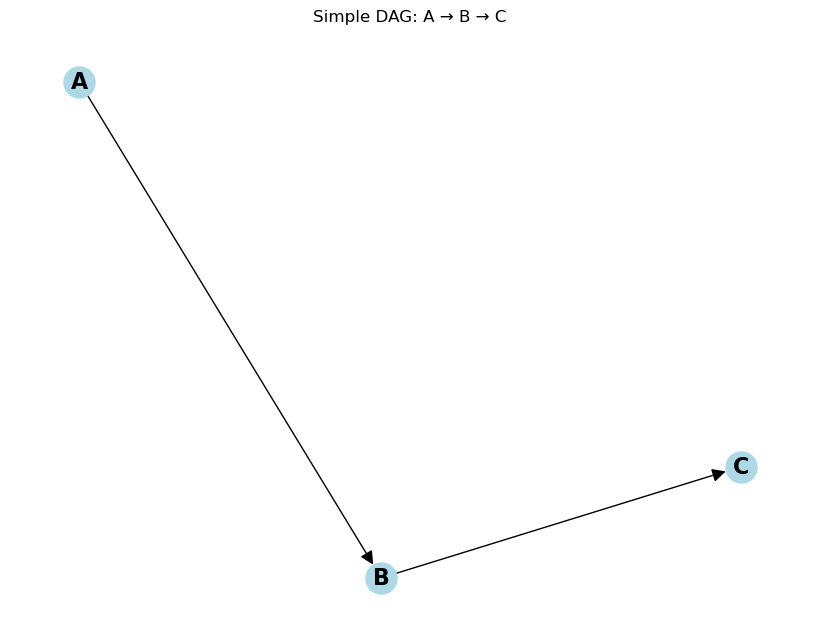

P(A=1, B=1, C=1) = 0.3360

Marginal probabilities for clique {A, B}:
P(A=0, B=0) = 0.2800
P(A=0, B=1) = 0.1200
P(A=1, B=0) = 0.1200
P(A=1, B=1) = 0.4800


In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List

def compute_joint_probability(a: int, b: int, c: int) -> float:
    """
    Compute P(A=a, B=b, C=c) using the chain rule and CPTs.
    """
    # P(A=a)
    p_a = cpds['A'][a]
    
    # P(B=b|A=a)
    p_b_given_a = cpds['B'][(a, b)]
    
    # P(C=c|B=b)
    p_c_given_b = cpds['C'][(b, c)]
    
    # Joint probability: P(A, B, C) = P(A) * P(B|A) * P(C|B)
    joint_prob = p_a * p_b_given_a * p_c_given_b
    return joint_prob

def compute_clique_marginal(clique: List[int], separator: List[int] = None) -> Dict:
    """
    Compute marginal probabilities for a clique or separator.
    This is a simplified version for demonstration.
    """
    if clique == [0, 1]:  # Clique {A, B}
        marginals = {}
        for a in [0, 1]:
            for b in [0, 1]:
                marginals[(a, b)] = cpds['A'][a] * cpds['B'][(a, b)]
        return marginals
    elif clique == [1, 2]:  # Clique {B, C}
        marginals = {}
        for b in [0, 1]:
            for c in [0, 1]:
                marginals[(b, c)] = cpds['B'][(0, b)] * cpds['C'][(b, c)]  # Assume A=0 for simplicity
        return marginals
    return {}

# Create a DAG
G = nx.DiGraph()

# Add nodes and edges
G.add_edges_from([('A', 'B'), ('B', 'C')])

# Visualize the DAG
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Position for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16, font_weight='bold', arrowsize=20)
plt.title("Simple DAG: A → B → C")
plt.show()

# Define CPTs as dictionaries
cpd_A = {0: 0.4, 1: 0.6}  # P(A)
cpd_B = {  # P(B|A)
    (0, 0): 0.7,  # P(B=0|A=0)
    (0, 1): 0.3,  # P(B=1|A=0)
    (1, 0): 0.2,  # P(B=0|A=1)
    (1, 1): 0.8   # P(B=1|A=1)
}
cpd_C = {  # P(C|B)
    (0, 0): 0.8,  # P(C=0|B=0)
    (0, 1): 0.2,  # P(C=1|B=0)
    (1, 0): 0.3,  # P(C=0|B=1)
    (1, 1): 0.7   # P(C=1|B=1)
}

# Store CPDs in a dictionary
cpds = {'A': cpd_A, 'B': cpd_B, 'C': cpd_C}

# Test joint probability computation
a, b, c = 1, 1, 1
joint_prob = compute_joint_probability(a, b, c)
print(f"P(A={a}, B={b}, C={c}) = {joint_prob:.4f}")

# Compute marginal for clique {A, B}
clique_ab = compute_clique_marginal([0, 1])
print("\nMarginal probabilities for clique {A, B}:")
for state, prob in clique_ab.items():
    print(f"P(A={state[0]}, B={state[1]}) = {prob:.4f}")